<a href="https://colab.research.google.com/github/Sham-Sandy/CIF/blob/main/Electrolyte_ionic_conductivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/WORKSHOP/Electrolyte

/content/drive/MyDrive/WORKSHOP/Electrolyte


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
np.random.seed(42)
n_samples = 50
data = {
    "Molecular_Weight": np.random.uniform(60, 300, n_samples),
    "Dipole_Moment": np.random.uniform(1, 10, n_samples),
    "Dielectric_Constant": np.random.uniform(2, 80, n_samples),
    "Boiling_Point": np.random.uniform(80, 300, n_samples),
}

conductivity = (
    0.01 * (100 - np.array(data["Molecular_Weight"])) +
    0.3 * np.array(data["Dipole_Moment"]) +
    0.02 * np.array(data["Dielectric_Constant"]) +
    np.random.normal(0, 0.5, n_samples)
)
data["Conductivity"] = conductivity
df = pd.DataFrame(data)


In [ ]:
X = df.drop("Conductivity", axis=1)
y = df["Conductivity"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} R²: {r2:.3f}")
    print(f"{model_name} MAE: {mae:.3f}")

print("Model Evaluation on Test Set:")
evaluate_model(y_test, rf.predict(X_test), "Random Forest")
evaluate_model(y_test, lr.predict(X_test), "Linear Regression")


Model Evaluation on Test Set:
Random Forest R²: 0.642
Random Forest MAE: 0.621
Linear Regression R²: 0.895
Linear Regression MAE: 0.295


<ipython-input-13-0eb77adedf6f>:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


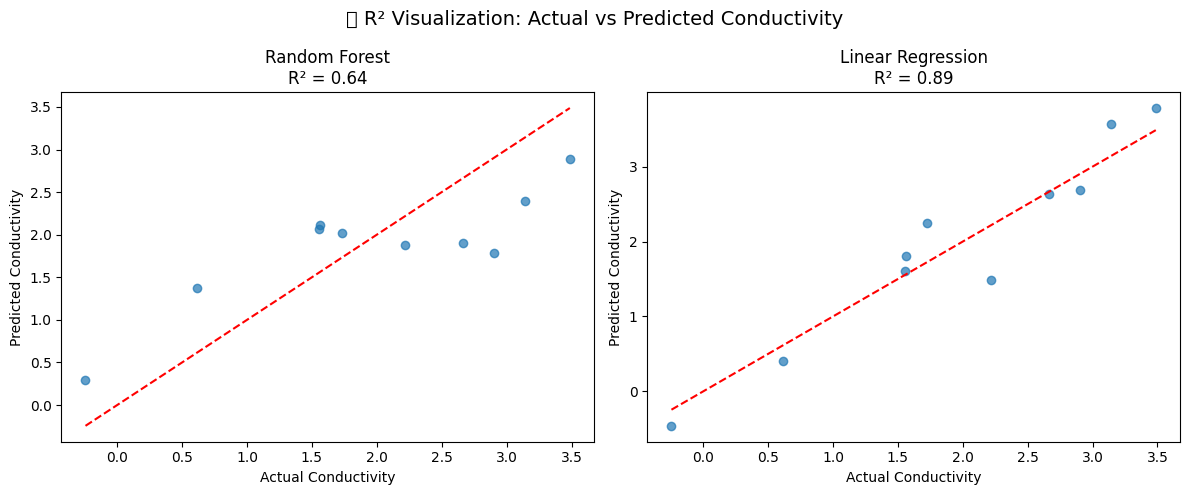

In [ ]:
# 📌 Section 10: R² Visualization for RF and Linear Regression

# Prepare actual and predicted values
# 🧮 Section 9.5: Get predictions on the test set
rf_preds = rf.predict(X_test)
lr_preds = lr.predict(X_test)

models = {
    "Random Forest": rf_preds,
    "Linear Regression": lr_preds
}

# Plot
plt.figure(figsize=(12, 5))

for i, (name, preds) in enumerate(models.items(), 1):
    r2 = r2_score(y_test, preds)
    plt.subplot(1, 2, i)
    plt.scatter(y_test, preds, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Conductivity")
    plt.ylabel("Predicted Conductivity")
    plt.title(f"{name}\nR² = {r2:.2f}")

plt.suptitle("🔍 R² Visualization: Actual vs Predicted Conductivity", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
print("\n🔋 Enter properties of a new electrolyte to predict its conductivity:")
try:
    mw = float(input("Enter Molecular Weight (60–300 g/mol): "))
    dipole = float(input("Enter Dipole Moment (1–10 D): "))
    dielectric = float(input("Enter Dielectric Constant (2–80): "))
    boiling = float(input("Enter Boiling Point (80–300 °C): "))

    user_input = pd.DataFrame([[mw, dipole, dielectric, boiling]], columns=X.columns)
    user_scaled = scaler.transform(user_input)

    rf_pred = rf.predict(user_scaled)[0]
    lr_pred = lr.predict(user_scaled)[0]

    print(f"\n🔮 Predicted Ionic Conductivity (mS/cm):")
    print(f"  • Random Forest: {rf_pred:.2f}")
    print(f"  • Linear Regression: {lr_pred:.2f}")

except Exception as e:
    print(f"⚠️ Error: {e}")
0


🔋 Enter properties of a new electrolyte to predict its conductivity:
Enter Molecular Weight (60–300 g/mol): 250
Enter Dipole Moment (1–10 D): 6
Enter Dielectric Constant (2–80): 65
Enter Boiling Point (80–300 °C): 27

🔮 Predicted Ionic Conductivity (mS/cm):
  • Random Forest: 1.68
  • Linear Regression: 1.72
